In [1]:
import glob
import os
from pprint import pprint
from random import randint

In [2]:
import cv2
import keras
import numpy as np
from matplotlib import pyplot as plt
from pandas import DataFrame
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.saved_model.load import load

2024-09-24 16:18:47.415178: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-24 16:18:48.096868: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
CROPPED_IMAGES_PATH = "resources/Cropped_Images"
#BEST_MODELS_PATH = "models/transfer_learning/EfficientNetV2L_model.keras"
BEST_MODELS_PATH = "models/transfer_learning/VGG16_model.keras"

In [4]:
def load_image(row):
    return cv2.imread(row['image_path'], 1)

In [5]:
def load_images():
    images_df = DataFrame()
    
    all_images = list(glob.glob(f"{CROPPED_IMAGES_PATH}/*/*.jpg"))
    images_df["image_path"] = all_images
    
    images_df["label_name"] = images_df["image_path"].apply(lambda path: path.split("/")[-2].lower())
    labels = [f.path.split("/")[-1].lower() for f in os.scandir(CROPPED_IMAGES_PATH) if f.is_dir()]
    
    label_encoder = LabelEncoder()
    label_encoder.fit(labels)
    images_df["label"] = label_encoder.transform(images_df["label_name"])
    
    return images_df

In [6]:
def get_races_from_labels(images_df):
    races = {}
    
    for index in range(0, len(images_df)):
        row = dict(images_df.iloc[index])
        if row['label'] not in races:
            races[row['label']] = row['label_name']
            
    return races

In [7]:
def prepare_image_for_prediction(image_path):
    image = keras.utils.load_img(image_path, target_size=(224, 224))
    input_arr = keras.utils.img_to_array(image)
    return np.array([input_arr])  # Convert single image to a batch.

In [8]:
def show_image(image_path):
    image = cv2.imread(image_path, 1)
    plt.imshow(image)
    plt.show()
    plt.close()

Starting inference script.

Images loaded.

120 races found.



2024-09-24 16:18:50.102528: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-24 16:18:50.148612: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-24 16:18:50.151657: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model loaded.

Predicting race of row id:18150. Its race is yorkshire_terrier, id:119



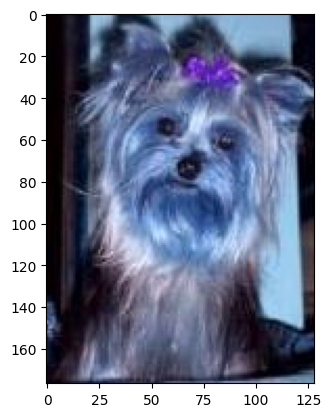

2024-09-24 16:18:51.683268: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


Predicted_race id:6, name:australian_terrier.

Predicting race of row id:1274. Its race is african_hunting_dog, id:2



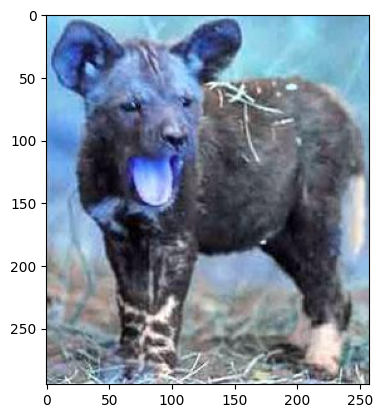

Predicted_race id:2, name:african_hunting_dog.

Predicting race of row id:2754. Its race is scottish_deerhound, id:97



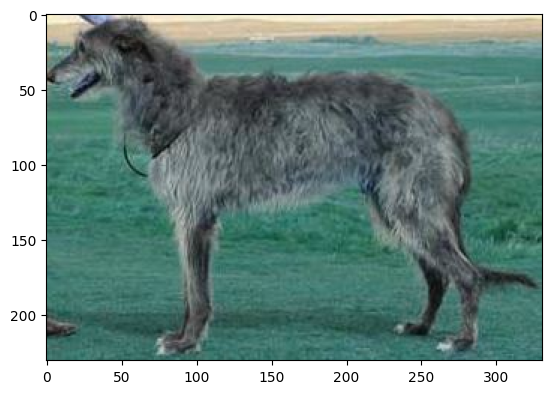

Predicted_race id:97, name:scottish_deerhound.

Predicting race of row id:15446. Its race is golden_retriever, id:49



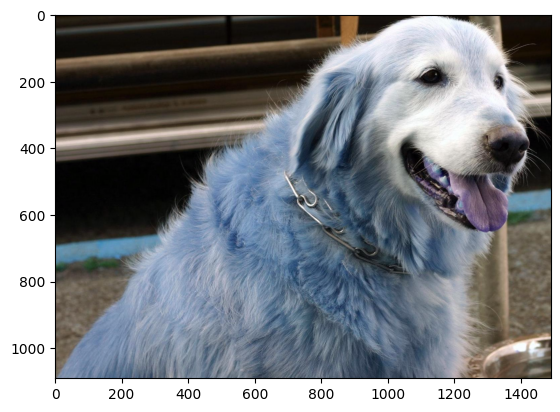

Predicted_race id:49, name:golden_retriever.

Predicting race of row id:5486. Its race is basenji, id:7



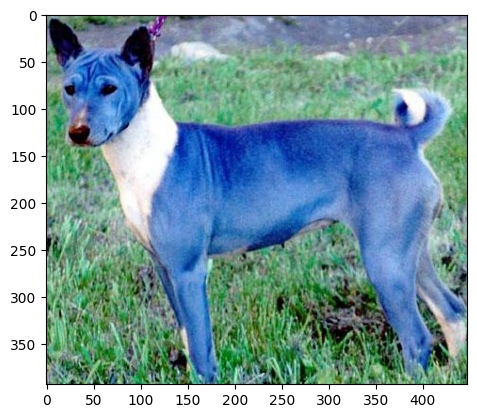

Predicted_race id:7, name:basenji.

Predicting race of row id:1496. Its race is saluki, id:93



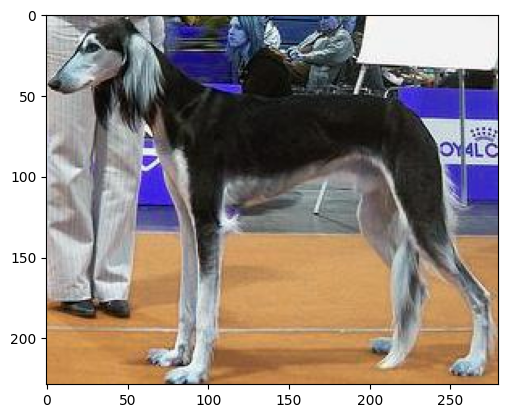

Predicted_race id:93, name:saluki.

Predicting race of row id:14715. Its race is borzoi, id:18



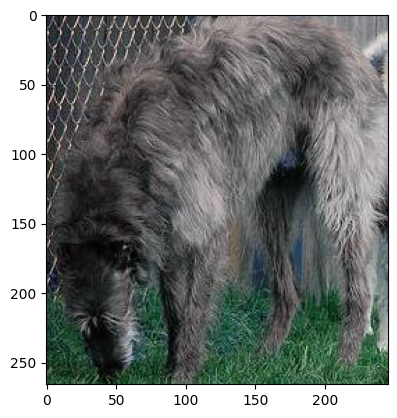

Predicted_race id:59, name:irish_wolfhound.

Predicting race of row id:10175. Its race is boston_bull, id:19



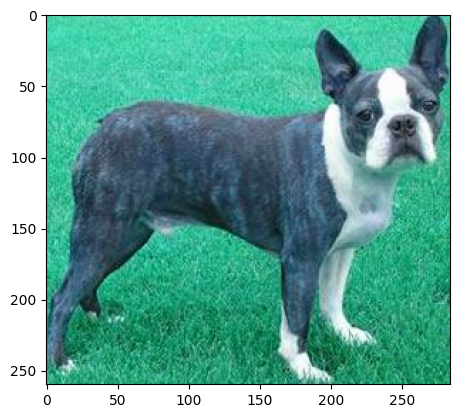

Predicted_race id:19, name:boston_bull.

Predicting race of row id:20443. Its race is japanese_spaniel, id:61



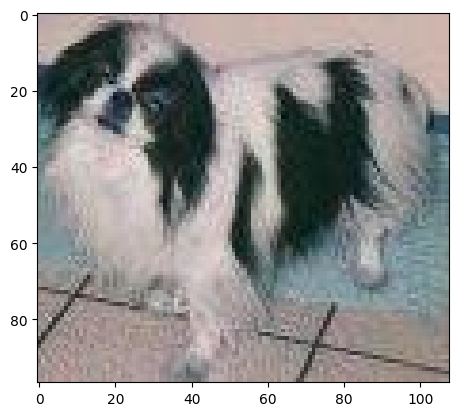

Predicted_race id:61, name:japanese_spaniel.

Predicting race of row id:4744. Its race is affenpinscher, id:0



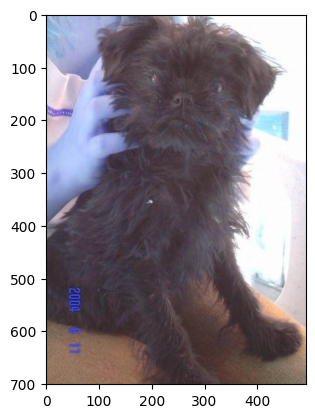

Predicted_race id:0, name:affenpinscher.

The inference script is now finished.



In [9]:
print("Starting inference script.\n")

images_df = load_images()
print("Images loaded.\n")

races = get_races_from_labels(images_df)
print(f"{len(races.keys())} races found.\n")

best_model = load(BEST_MODELS_PATH)
print("Model loaded.\n")

for iteration in range(1, 11):
    row_id = randint(0, len(images_df))
    row = images_df.iloc[row_id]
    print(f"Predicting race of row id:{row_id}. Its race is {row['label_name']}, id:{row['label']}\n")

    show_image(row['image_path'])

    prepared_image = prepare_image_for_prediction(row['image_path'])
    predictions = best_model.serve(prepared_image)

    preds_list = list(predictions[0])
    predicted_race_id = preds_list.index(max(preds_list))
    print(f"Predicted_race id:{predicted_race_id}, name:{races[predicted_race_id]}.\n")

print("The inference script is now finished.\n")